In [1]:
!pip install geopy

In [2]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from geopy.distance import geodesic # Importing the geodesic module from the library
from sklearn.impute import SimpleImputer ## HAndling Missing Values
from sklearn.preprocessing import StandardScaler # Handling Feature Scaling
from sklearn.preprocessing import OrdinalEncoder # Ordinal Encoding
from sklearn.pipeline import Pipeline #Pipeline Creation
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet # Model Training
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error # Model Evaluation metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

In [3]:
warnings.filterwarnings('ignore')

In [4]:
data = pd.read_csv("data/finalTrain.csv")

In [5]:
data.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,0xcdcd,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,12-02-2022,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46
1,0xd987,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,13-02-2022,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23
2,0x2784,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,04-03-2022,17:30,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21
3,0xc8b6,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,13-02-2022,09:20,09:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20
4,0xdb64,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,14-02-2022,19:50,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41


In [6]:
data.tail()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
45579,0x7c09,JAPRES04DEL01,30.0,4.8,26.902328,75.794257,26.912328,75.804257,24-03-2022,11:35,11:45,Windy,High,1,Meal,motorcycle,0.0,No,Metropolitian,32
45580,0xd641,AGRRES16DEL01,21.0,4.6,0.000000,0.000000,0.070000,0.070000,16-02-2022,19:55,20:10,Windy,Jam,0,Buffet,motorcycle,1.0,No,Metropolitian,36
45581,0x4f8d,CHENRES08DEL03,30.0,4.9,13.022394,80.242439,13.052394,80.272439,11-03-2022,23:50,24:05:00,Cloudy,Low,1,Drinks,scooter,0.0,No,Metropolitian,16
45582,0x5eee,COIMBRES11DEL01,20.0,4.7,11.001753,76.986241,11.041753,77.026241,07-03-2022,13:35,13:40,Cloudy,High,0,Snack,motorcycle,1.0,No,Metropolitian,26
45583,0x5fb2,RANCHIRES09DEL02,23.0,4.9,23.351058,85.325731,23.431058,85.405731,02-03-2022,17:10,17:15,Fog,Medium,2,Snack,scooter,1.0,No,Metropolitian,36


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45584 entries, 0 to 45583
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45584 non-null  object 
 1   Delivery_person_ID           45584 non-null  object 
 2   Delivery_person_Age          43730 non-null  float64
 3   Delivery_person_Ratings      43676 non-null  float64
 4   Restaurant_latitude          45584 non-null  float64
 5   Restaurant_longitude         45584 non-null  float64
 6   Delivery_location_latitude   45584 non-null  float64
 7   Delivery_location_longitude  45584 non-null  float64
 8   Order_Date                   45584 non-null  object 
 9   Time_Orderd                  43853 non-null  object 
 10  Time_Order_picked            45584 non-null  object 
 11  Weather_conditions           44968 non-null  object 
 12  Road_traffic_density         44983 non-null  object 
 13  Vehicle_conditio

In [8]:
data.isnull().sum()

ID                                0
Delivery_person_ID                0
Delivery_person_Age            1854
Delivery_person_Ratings        1908
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Order_Date                        0
Time_Orderd                    1731
Time_Order_picked                 0
Weather_conditions              616
Road_traffic_density            601
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries             993
Festival                        228
City                           1200
Time_taken (min)                  0
dtype: int64

In [9]:
data.shape

(45584, 20)

In [10]:
# dropping nan values from dataframe

data = data.dropna()

In [11]:
## Let's check duplicates first

data[~data.duplicated()] # no duplicates found inside data

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,0xcdcd,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,12-02-2022,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46
1,0xd987,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,13-02-2022,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23
2,0x2784,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,04-03-2022,17:30,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21
3,0xc8b6,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,13-02-2022,09:20,09:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20
4,0xdb64,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,14-02-2022,19:50,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45579,0x7c09,JAPRES04DEL01,30.0,4.8,26.902328,75.794257,26.912328,75.804257,24-03-2022,11:35,11:45,Windy,High,1,Meal,motorcycle,0.0,No,Metropolitian,32
45580,0xd641,AGRRES16DEL01,21.0,4.6,0.000000,0.000000,0.070000,0.070000,16-02-2022,19:55,20:10,Windy,Jam,0,Buffet,motorcycle,1.0,No,Metropolitian,36
45581,0x4f8d,CHENRES08DEL03,30.0,4.9,13.022394,80.242439,13.052394,80.272439,11-03-2022,23:50,24:05:00,Cloudy,Low,1,Drinks,scooter,0.0,No,Metropolitian,16
45582,0x5eee,COIMBRES11DEL01,20.0,4.7,11.001753,76.986241,11.041753,77.026241,07-03-2022,13:35,13:40,Cloudy,High,0,Snack,motorcycle,1.0,No,Metropolitian,26


In [12]:
#data = data.replace('NaN', float(np.nan), regex=True)

## EDA and FE

<Axes: xlabel='Delivery_person_Age'>

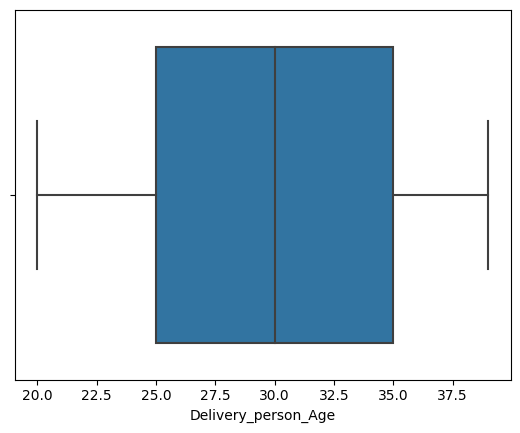

In [13]:
sns.boxplot(x='Delivery_person_Age',data=data)

In [14]:
data['Delivery_person_Age'].value_counts()

Delivery_person_Age
35.0    2177
36.0    2158
37.0    2137
30.0    2137
38.0    2118
32.0    2115
33.0    2082
34.0    2078
22.0    2071
39.0    2064
28.0    2056
24.0    2055
29.0    2036
31.0    2032
21.0    2031
25.0    2020
27.0    2014
26.0    2012
20.0    1998
23.0    1968
Name: count, dtype: int64

In [15]:
# Now find the distance between restaurant location and delivery location

restaurant_coordinates = data[['Restaurant_latitude','Restaurant_longitude']].to_numpy()
delivery_coordinates = data[['Delivery_location_latitude','Delivery_location_longitude']].to_numpy()

data['distance(km)'] = ''
for i in range(len(data)):
    data['distance(km)'].iloc[i]=geodesic(restaurant_coordinates[i],delivery_coordinates[i]).km
    
data['Restaurant_Delivery_distance(km)'] = data['distance(km)'].astype('float')

<Axes: xlabel='Restaurant_Delivery_distance(km)'>

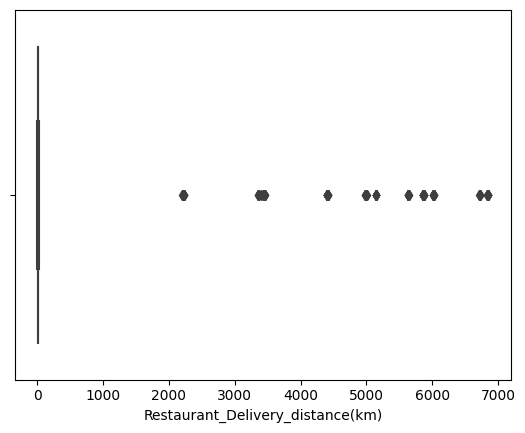

In [16]:
sns.boxplot(x='Restaurant_Delivery_distance(km)',data=data)

In [17]:
quantiles = data['Restaurant_Delivery_distance(km)'].quantile([0.25,0.5,0.75]).to_list()

In [18]:
quantiles

[4.654290210819338, 9.251428706202903, 13.71350478925863]

In [19]:
q1 = quantiles[0]
q3 = quantiles[2]
IQR = q3-q1
LF = q1-1.5*IQR
UF = q3 + 1.5*IQR

In [20]:
LF,UF

(-8.9345316568396, 27.302326656917568)

In [21]:
data[data['Restaurant_Delivery_distance(km)']<0]

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,...,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),distance(km),Restaurant_Delivery_distance(km)


In [22]:
data = data[~((data['Restaurant_Delivery_distance(km)']<(q1-1.5*IQR)) | (data['Restaurant_Delivery_distance(km)']>(q3+1.5*IQR)))]

<Axes: xlabel='Restaurant_Delivery_distance(km)'>

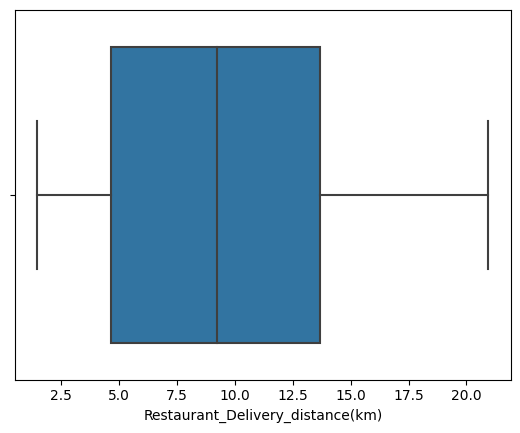

In [23]:
sns.boxplot(x='Restaurant_Delivery_distance(km)',data=data)

In [24]:
data.shape

(41213, 22)

In [25]:
def filter_int_float_values(column_data):
    for i in range(len(column_data)):
        if '.' in str(column_data.iloc[i]) or  column_data.iloc[i] == '1':
            column_data.iloc[i] = np.nan

    return column_data

In [26]:
# it is found that there are some float and integer values in Time_Orderd and Time_Order_picked column, filter those and also get the data with upto 5 digits

data['Time_Orderd'] = filter_int_float_values(data['Time_Orderd']).str.slice(0,5) #hh:mm:ss
data['Time_Order_picked'] = filter_int_float_values(data['Time_Order_picked']).str.slice(0,5)

In [27]:
### Since, Time_Orderd and Time_Order_picked columns has some NaN values, it will effect on output variable, we can remove those records

#data = data[~data['Time_Orderd'].isnull()]
#data = data[~data['Time_Order_picked'].isnull()]

## Concatenating :00 atlast to make it date format and also we can calculate the preparation time using these values
data['Time_Orderd'] = data['Time_Orderd'] + ':00'
data['Time_Order_picked'] = data['Time_Order_picked'] + ':00'
data = data.reset_index()
data.drop(columns=['index'],axis=1,inplace=True)

In [28]:
## Let's calculate preparation time

data['Time_Orderd'] = pd.to_timedelta(data['Time_Orderd'])
data['Time_Order_picked'] = pd.to_timedelta(data['Time_Order_picked'])
td = pd.Timedelta(1, "d") # to indicate 1 day

data.loc[(data['Time_Order_picked'] < data['Time_Orderd']), 'preparation1'] = data['Time_Order_picked'] - data['Time_Orderd'] + td
data.loc[(data['Time_Order_picked'] > data['Time_Orderd']), 'preparation2'] = data['Time_Order_picked'] - data['Time_Orderd'] 

data['preparation1'].fillna(data['preparation2'], inplace=True)
data['preparation_time(min)'] = pd.to_timedelta(data['preparation1'], "minute")
for i in range(len(data['preparation_time(min)'])):
    data['preparation_time(min)'][i] = data['preparation_time(min)'][i].total_seconds()/60 # converting into minutes
data['preparation_time(min)'] = data['preparation_time(min)'].astype(float)

In [29]:
data['preparation_time(min)'].value_counts()

preparation_time(min)
5.0     11273
15.0    11199
10.0    11190
Name: count, dtype: int64

In [30]:
#data['multiple_deliveries'].fillna(data['multiple_deliveries'].median(skipna=True),inplace=True)
#data['Vehicle_condition'].fillna(data['Vehicle_condition'].median(skipna=True),inplace=True)

In [31]:
#data['preparation_time(min)'] = data['preparation_time(min)'].astype(int)
data['Restaurant_Delivery_distance(km)'] = round(data['Restaurant_Delivery_distance(km)'],2)
data['Festival'] = data['Festival'].fillna('No')

In [32]:
data.drop(columns=['ID','Delivery_person_ID','Time_Orderd','Time_Order_picked','Order_Date','preparation1','preparation2','Type_of_order','Restaurant_latitude','Restaurant_longitude','Delivery_location_latitude','Delivery_location_longitude','distance(km)'],axis=1,inplace=True)

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41213 entries, 0 to 41212
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Delivery_person_Age               41213 non-null  float64
 1   Delivery_person_Ratings           41213 non-null  float64
 2   Weather_conditions                41213 non-null  object 
 3   Road_traffic_density              41213 non-null  object 
 4   Vehicle_condition                 41213 non-null  int64  
 5   Type_of_vehicle                   41213 non-null  object 
 6   multiple_deliveries               41213 non-null  float64
 7   Festival                          41213 non-null  object 
 8   City                              41213 non-null  object 
 9   Time_taken (min)                  41213 non-null  int64  
 10  Restaurant_Delivery_distance(km)  41213 non-null  float64
 11  preparation_time(min)             33662 non-null  float64
dtypes: f

In [34]:
columns_data = ['Delivery_person_Age','Delivery_person_Ratings','Restaurant_Delivery_distance(km)','preparation_time(min)','Weather_conditions','Road_traffic_density','Vehicle_condition','Type_of_vehicle','multiple_deliveries','Festival','City','Time_taken (min)']

data = data[columns_data]

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41213 entries, 0 to 41212
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Delivery_person_Age               41213 non-null  float64
 1   Delivery_person_Ratings           41213 non-null  float64
 2   Restaurant_Delivery_distance(km)  41213 non-null  float64
 3   preparation_time(min)             33662 non-null  float64
 4   Weather_conditions                41213 non-null  object 
 5   Road_traffic_density              41213 non-null  object 
 6   Vehicle_condition                 41213 non-null  int64  
 7   Type_of_vehicle                   41213 non-null  object 
 8   multiple_deliveries               41213 non-null  float64
 9   Festival                          41213 non-null  object 
 10  City                              41213 non-null  object 
 11  Time_taken (min)                  41213 non-null  int64  
dtypes: f

In [36]:
data

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_Delivery_distance(km),preparation_time(min),Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,36.0,4.2,10.27,15.0,Fog,Jam,2,motorcycle,3.0,No,Metropolitian,46
1,21.0,4.7,6.23,10.0,Stormy,High,1,motorcycle,1.0,No,Metropolitian,23
2,23.0,4.7,13.76,10.0,Sandstorms,Medium,1,scooter,1.0,No,Metropolitian,21
3,34.0,4.3,2.93,10.0,Sandstorms,Low,0,motorcycle,0.0,No,Metropolitian,20
4,24.0,4.7,19.37,15.0,Fog,Jam,1,scooter,1.0,No,Metropolitian,41
...,...,...,...,...,...,...,...,...,...,...,...,...
41208,30.0,4.8,1.49,10.0,Windy,High,1,motorcycle,0.0,No,Metropolitian,32
41209,21.0,4.6,10.98,15.0,Windy,Jam,0,motorcycle,1.0,No,Metropolitian,36
41210,30.0,4.9,4.65,15.0,Cloudy,Low,1,scooter,0.0,No,Metropolitian,16
41211,20.0,4.7,6.22,5.0,Cloudy,High,0,motorcycle,1.0,No,Metropolitian,26


## Graphs

In [37]:
## Separating numerical and categorical features

numerical_features = [col for col in data.columns if data[col].dtype != 'object']
categorical_features = [col for col in data.columns if data[col].dtype == 'object']

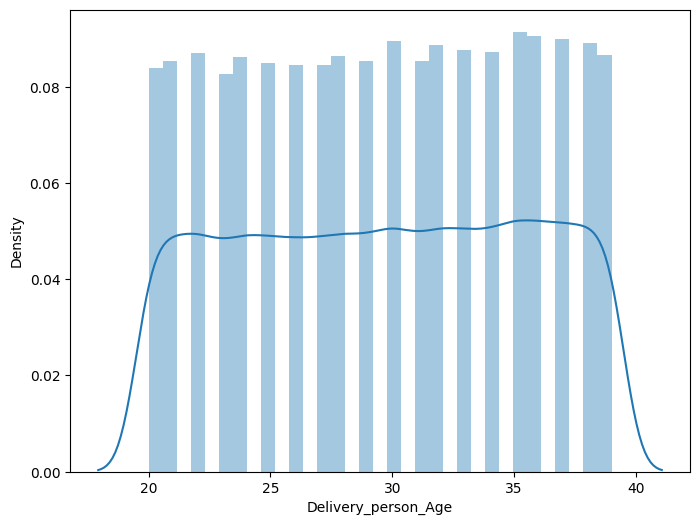

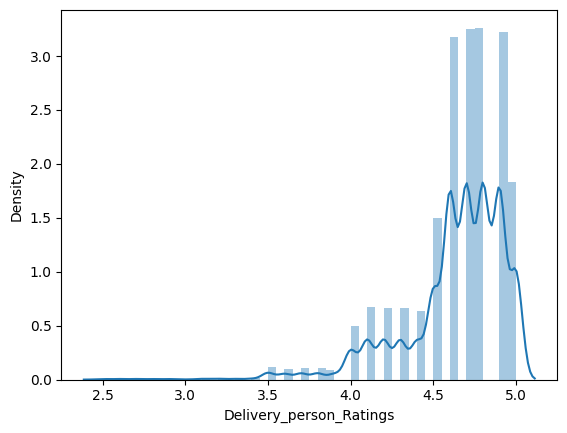

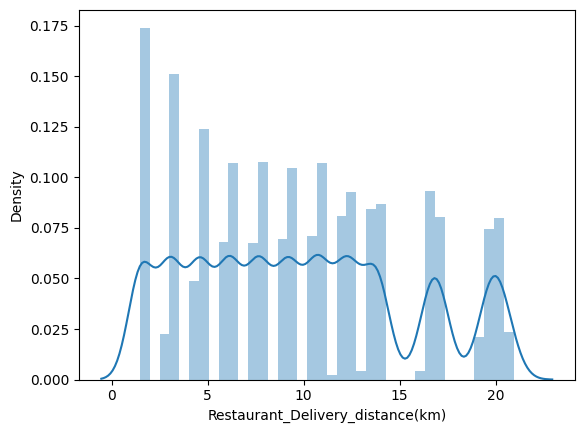

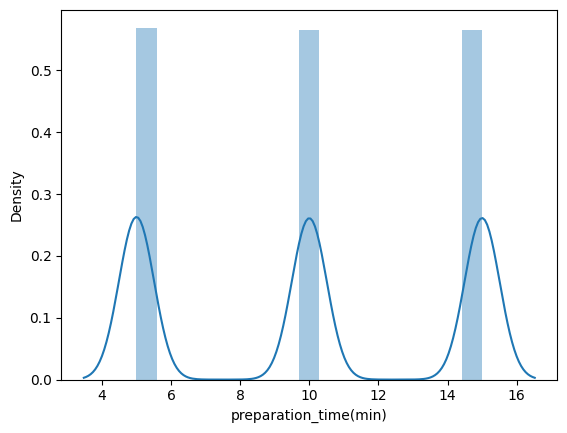

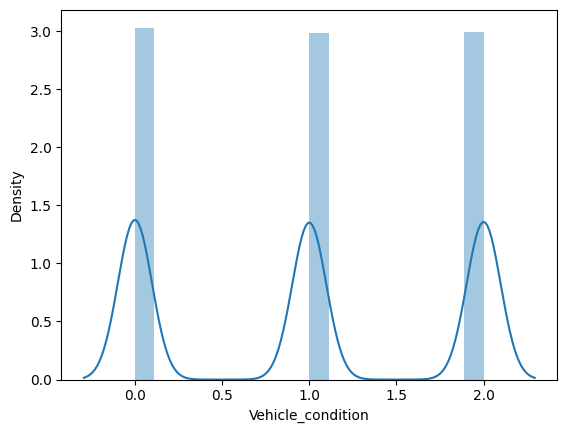

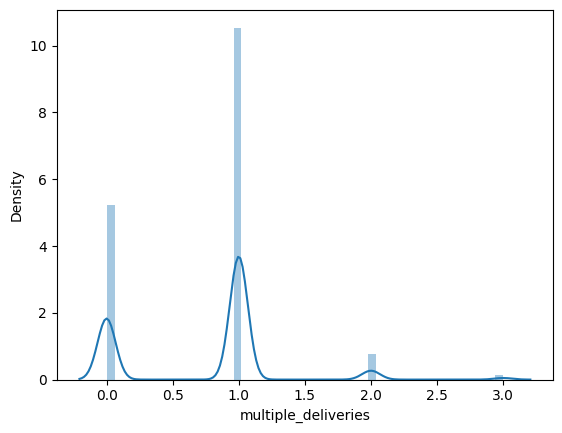

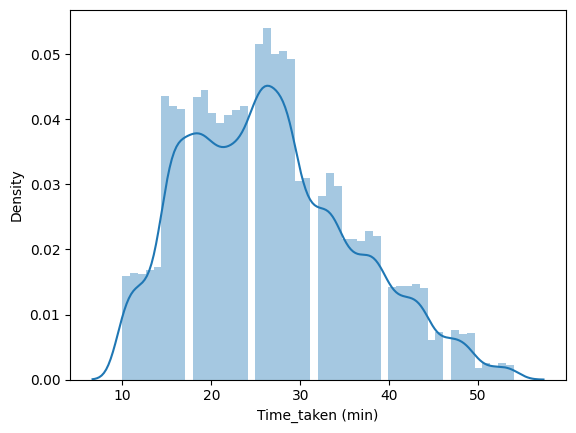

In [38]:
plt.figure(figsize=(8,6))
x=0
for i in numerical_features:
    sns.distplot(data[i],kde=True)
    print('\n')
    plt.show()

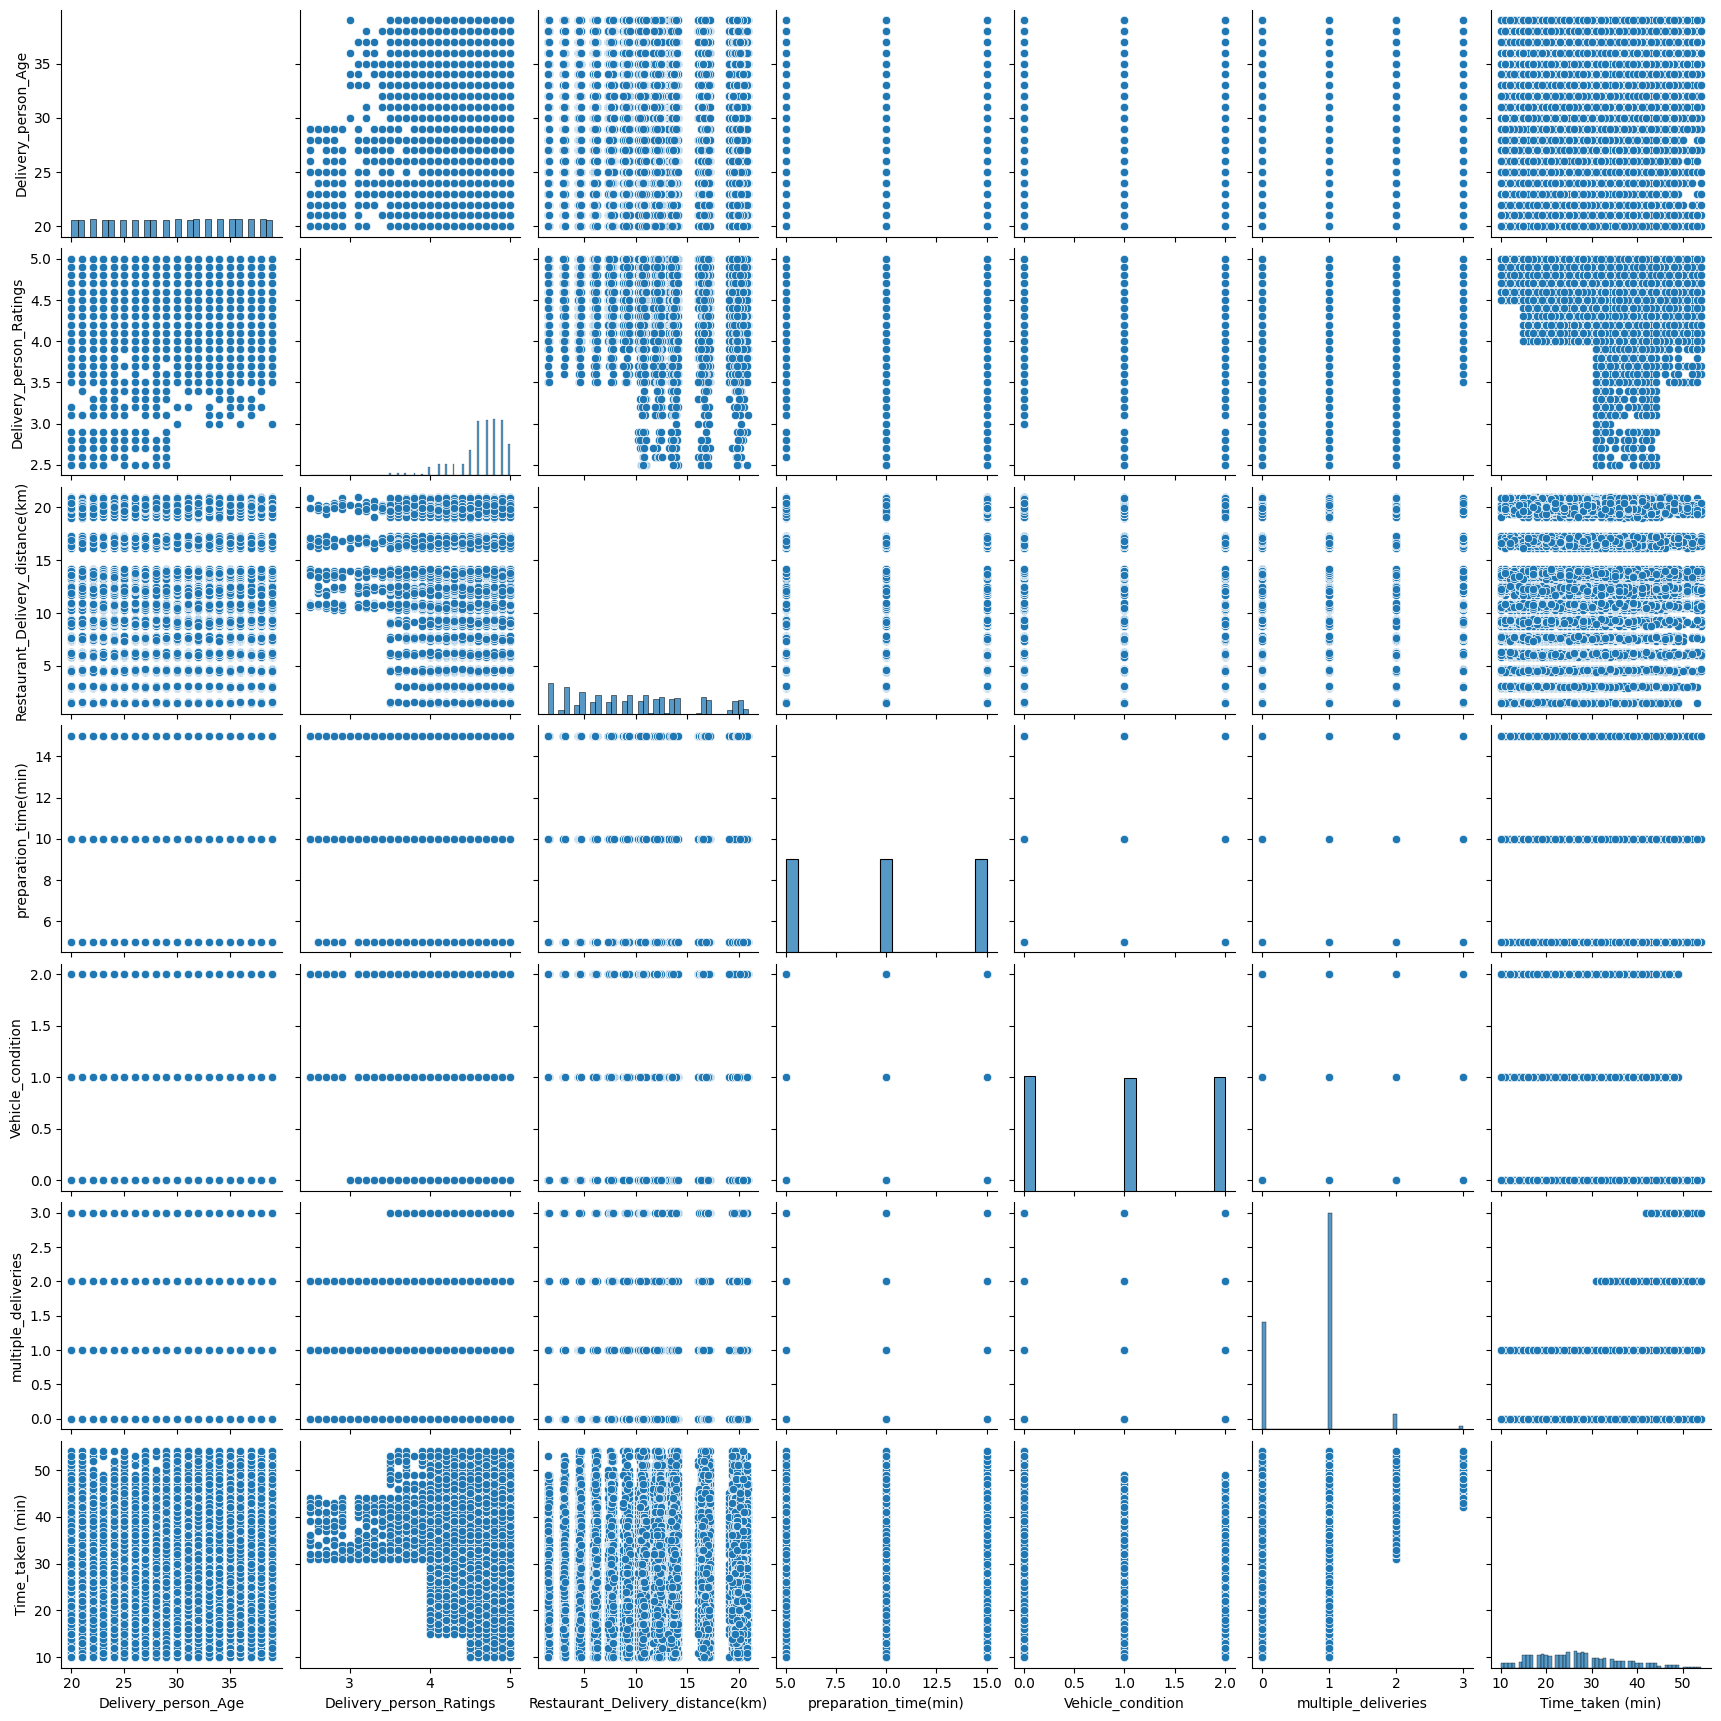

In [39]:
sns.pairplot(data[numerical_features])

<Axes: >

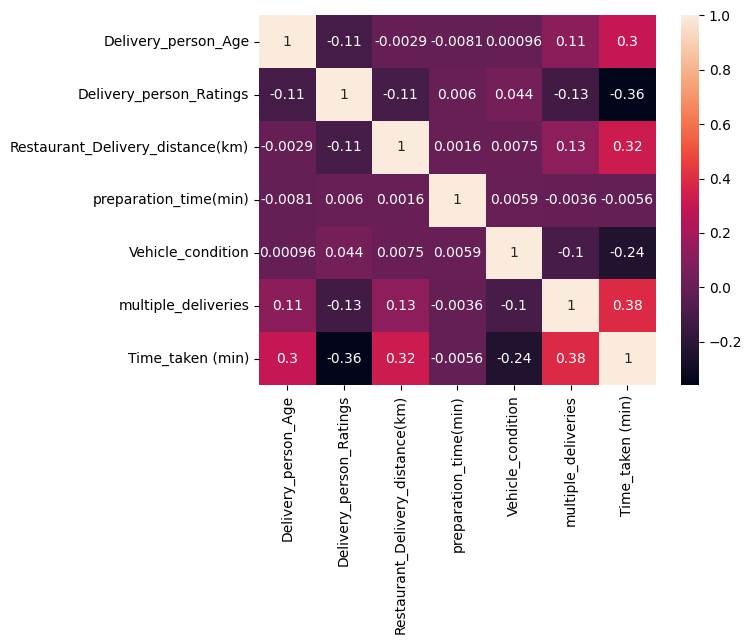

In [40]:
## finding correlation

sns.heatmap(data[numerical_features].corr(),annot=True)

Weather_conditions
Cloudy        Axes(0.125,0.11;0.775x0.77)
Fog           Axes(0.125,0.11;0.775x0.77)
Sandstorms    Axes(0.125,0.11;0.775x0.77)
Stormy        Axes(0.125,0.11;0.775x0.77)
Sunny         Axes(0.125,0.11;0.775x0.77)
Windy         Axes(0.125,0.11;0.775x0.77)
Name: Time_taken (min), dtype: object

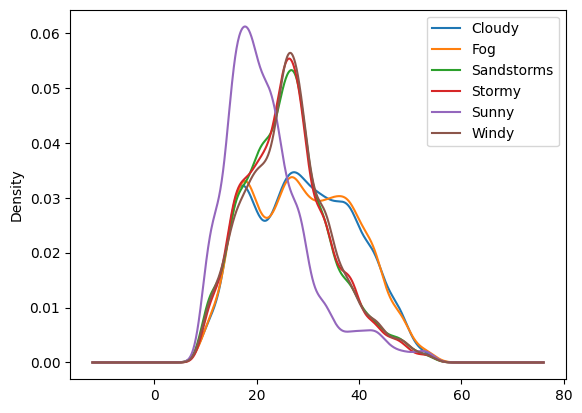

In [41]:
# Let's find the line graph between Weather conditions and time taken

data.groupby('Weather_conditions')['Time_taken (min)'].plot(kind='kde',legend=True)

- It is observed that in all weather conditions, time taken to delivery is between 10min(approx) to 40min(approx)
- During sunny weather time taken to delivery is more

<Axes: xlabel='Type_of_vehicle', ylabel='count'>

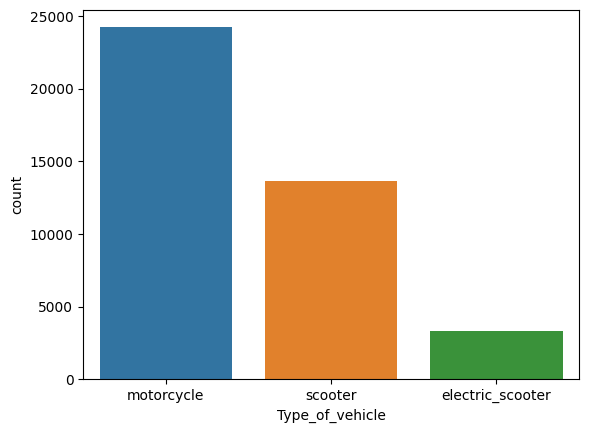

In [42]:
sns.countplot(x='Type_of_vehicle',data=data)

- Most of the people uses Motorcycle

<Axes: xlabel='Weather_conditions', ylabel='Time_taken (min)'>

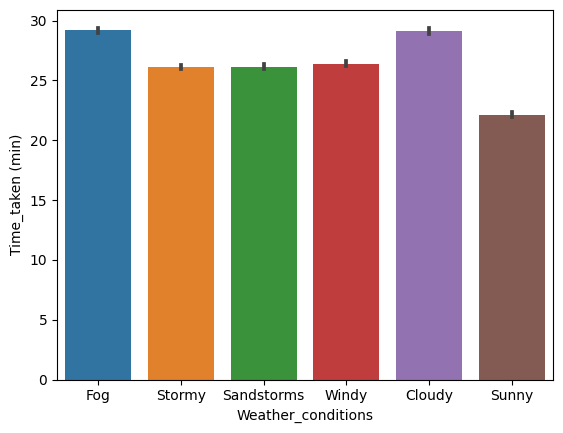

In [43]:
sns.barplot(x = 'Weather_conditions' , y = 'Time_taken (min)' , data = data)

- During Sunny weather, order was delivered fast

In [44]:
import scipy.stats as ss

cat_var1 = categorical_features
cat_var2 = categorical_features

## Creating all possible combinations between the above two variables list

result = []
for i in cat_var1:
    for j in cat_var2:
        if i != j:
            result.append((i,j,list(ss.chi2_contingency(pd.crosstab(data[i], data[j],normalize='index')))[1]))

result

[('Weather_conditions', 'Road_traffic_density', 1.0),
 ('Weather_conditions', 'Type_of_vehicle', 1.0),
 ('Weather_conditions', 'Festival', 0.9999918536580901),
 ('Weather_conditions', 'City', 0.9999999999995546),
 ('Road_traffic_density', 'Weather_conditions', 1.0),
 ('Road_traffic_density', 'Type_of_vehicle', 0.999999999999504),
 ('Road_traffic_density', 'Festival', 0.9967449996869925),
 ('Road_traffic_density', 'City', 0.9999990653969781),
 ('Type_of_vehicle', 'Weather_conditions', 1.0),
 ('Type_of_vehicle', 'Road_traffic_density', 0.9999999999992691),
 ('Type_of_vehicle', 'Festival', 0.993454262876558),
 ('Type_of_vehicle', 'City', 0.9999895445967318),
 ('Festival', 'Weather_conditions', 0.9997698226581028),
 ('Festival', 'Road_traffic_density', 0.9398712462277846),
 ('Festival', 'Type_of_vehicle', 0.9528919106924165),
 ('Festival', 'City', 0.9667589145008175),
 ('City', 'Weather_conditions', 0.999999999409156),
 ('City', 'Road_traffic_density', 0.989366519127725),
 ('City', 'Type_o

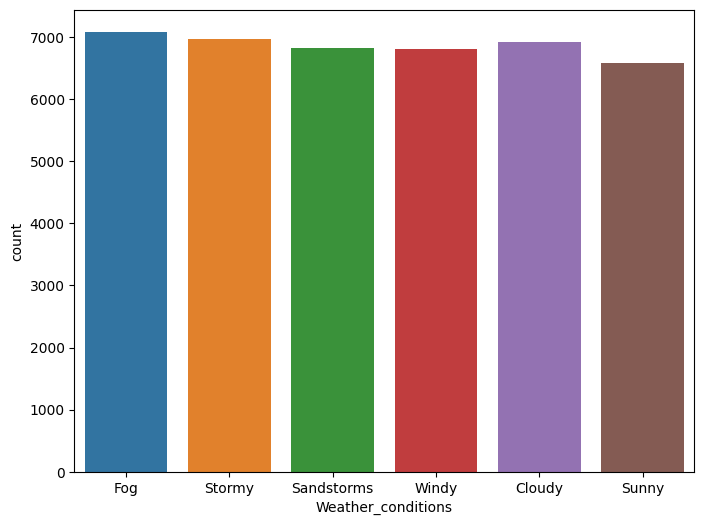

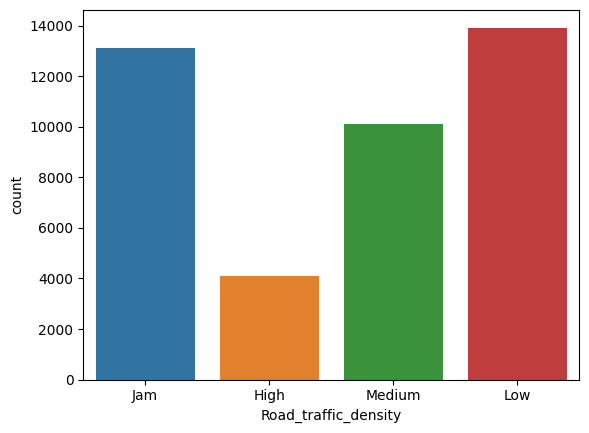

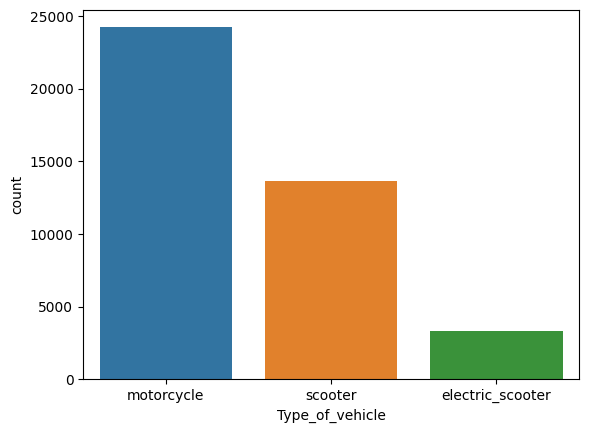

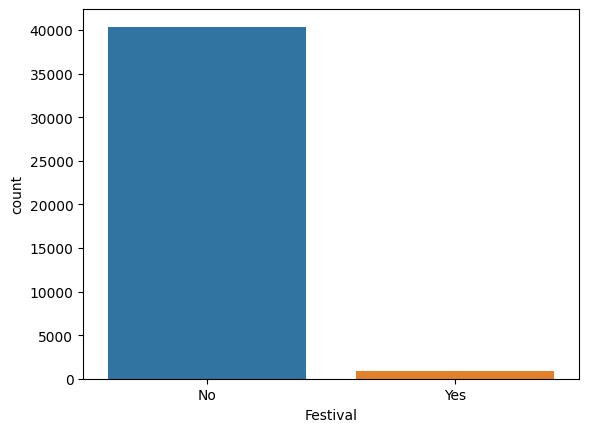

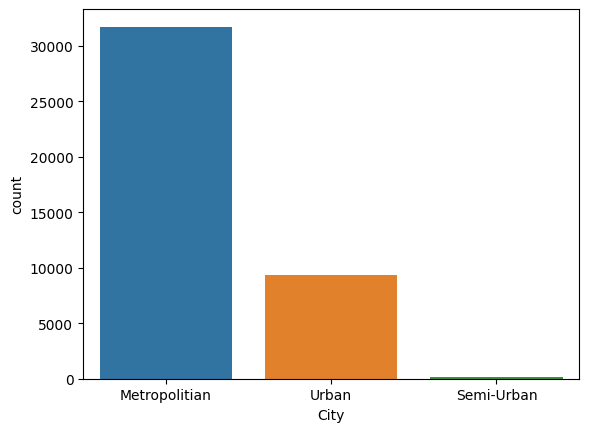

In [45]:
plt.figure(figsize=(8,6))
x=0
for i in categorical_features:
    sns.countplot(x = i , data = data)
    print('\n')
    plt.show()

In [46]:
# it is found that weather conditions column is highly correlated to each other categorical column

#data.drop(columns=['Weather_conditions'],axis=1,inplace=True)

In [47]:
data['City'].unique()

array(['Metropolitian', 'Urban', 'Semi-Urban'], dtype=object)

## Model Training

In [48]:
## Independent and dependent features
X = data.drop(labels=['Time_taken (min)'],axis=1)
Y = data[['Time_taken (min)']]

In [49]:
Y

,Time_taken (min)
0,46
1,23
2,21
3,20
4,41
...,...
41208,32
41209,36
41210,16
41211,26


In [50]:
# Define which columns should be ordinal-encoded and which should be scaled
categorical_cols = X.select_dtypes(include='object').columns
numerical_cols = X.select_dtypes(exclude='object').columns

In [51]:
weather_categories = ['Sunny','Stormy','Sandstorms','Windy','Cloudy','Fog']
traffic_categories = ['Low','Medium','High','Jam']
vehicleType_categories = ['electric_scooter','scooter','motorcycle']
festival_categories=['No','Yes']
city_categories= ['Urban','Metropolitian','Semi-Urban']

In [52]:
## Numerical Pipeline
num_pipeline=Pipeline(
    steps=[
    ('imputer',SimpleImputer(strategy='median')),
    ('scaler',StandardScaler())

    ]

)

# Categorigal Pipeline
cat_pipeline=Pipeline(
    steps=[
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('ordinalencoder',OrdinalEncoder(categories=[weather_categories,traffic_categories,vehicleType_categories,festival_categories,city_categories])),
    ('scaler',StandardScaler())
    ]

)

preprocessor=ColumnTransformer([
('num_pipeline',num_pipeline,numerical_cols),
('cat_pipeline',cat_pipeline,categorical_cols)
])


In [53]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.20,random_state=36)

In [54]:
X_train=pd.DataFrame(preprocessor.fit_transform(X_train),columns=preprocessor.get_feature_names_out())
X_test=pd.DataFrame(preprocessor.transform(X_test),columns=preprocessor.get_feature_names_out())

In [55]:
X_train.head()

,num_pipeline__Delivery_person_Age,num_pipeline__Delivery_person_Ratings,num_pipeline__Restaurant_Delivery_distance(km),num_pipeline__preparation_time(min),num_pipeline__Vehicle_condition,num_pipeline__multiple_deliveries,cat_pipeline__Weather_conditions,cat_pipeline__Road_traffic_density,cat_pipeline__Type_of_vehicle,cat_pipeline__Festival,cat_pipeline__City
0,-1.144703,0.845126,-0.633566,0.001313,-1.219054,0.443664,-0.308261,0.482481,0.769453,-0.141145,0.525792
1,-1.318135,-0.104625,-1.475035,1.354480,1.230869,-1.303749,0.865404,0.482481,-2.354600,-0.141145,-1.824764
2,1.630208,0.211958,1.286986,1.354480,0.005907,-1.303749,1.452237,-1.124733,0.769453,-0.141145,0.525792
3,1.630208,0.845126,-0.356649,0.001313,0.005907,-1.303749,1.452237,-1.124733,0.769453,-0.141145,0.525792
4,0.242752,-0.104625,-0.662151,0.001313,1.230869,0.443664,0.865404,0.482481,-2.354600,-0.141145,0.525792


In [56]:
import numpy as np
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [57]:
## Train multiple models

models={
    'LinearRegression':LinearRegression(),
    'Lasso':Lasso(),
    'Ridge':Ridge(),
    'Elasticnet':ElasticNet(),
    'DecisionTreeRegressor':DecisionTreeRegressor(),
    'RandomForestRegressor' : RandomForestRegressor(),
    'SupportVectorRegressor' : SVR(kernel='linear')
}
trained_model_list=[]
model_list=[]
r2_list=[]

for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train,y_train)

    #Make Predictions
    y_pred=model.predict(X_test)

    mae, rmse, r2_square=evaluate_model(y_test,y_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model Training Performance')
    print("RMSE:",rmse)
    print("MAE:",mae)
    print("R2 score",r2_square*100)

    r2_list.append(r2_square)
    
    print('='*35)
    print('\n')


LinearRegression
Model Training Performance
RMSE: 6.042883726026557
MAE: 4.83092806015315
R2 score 58.450264065164795


Lasso
Model Training Performance
RMSE: 6.53575331304972
MAE: 5.231873117429741
R2 score 51.39610256515594


Ridge
Model Training Performance
RMSE: 6.0428843280694515
MAE: 4.830926790035
R2 score 58.45025578609617


Elasticnet
Model Training Performance
RMSE: 6.625072347656801
MAE: 5.319631909194184
R2 score 50.058562041323995


DecisionTreeRegressor
Model Training Performance
RMSE: 5.130426161141882
MAE: 3.9367341987140603
R2 score 70.0507000630746


RandomForestRegressor
Model Training Performance
RMSE: 3.7696492326743574
MAE: 3.0303635754435225
R2 score 83.83105536613944


SupportVectorRegressor
Model Training Performance
RMSE: 6.0537103099172045
MAE: 4.822465349621744
R2 score 58.301247570374436


